# Algorithme des arbres de décision pour  un problème de classification

Nous allons travailler avec le jeu de données breast_cancer,pour plus d'informations cliquer sur ce lien https://goo.gl/U2Uwz2

## Chargement des bibiliothèque nécessaires

## Vérifier la version de sklearn

In [106]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import warnings
%matplotlib inline
# get rid of annoying seaborn and scikit learn errors
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

- Créer une variable `df` à qui vous affectez le jeux de données breast_cancer

In [107]:
df = load_breast_cancer()

In [108]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

- Afficher df

In [109]:
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [110]:
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [111]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

#### Extraire de `df` : les observations dans un tableau 2D `X` et les classes dans un tableau 1D `y`

In [112]:
X = df.data
y = df.target

In [113]:
X.shape

(569, 30)

In [114]:
y.shape

(569,)

#### Diviser l'ensemble des observations X et l'ensemble de classes y, chacun en deux sous-ensembles :
- un sous-ensemble d'apprentissage : 70% de l'ensemble initial
- un sous-ensemble de test : 30% de l'ensemble initial


In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=3)# random_state=some_number pour garantir que votre split sera toujours le même

#### Importer le modèle __`DecisionTreeClassifier`__ à partir du module __`tree`__ du module __`sklearn`__.


In [116]:
from sklearn.tree import DecisionTreeClassifier

#### Afficher la description de la classe __`DecisionTreeClassifier`__

In [117]:
DecisionTreeClassifier()
DecisionTreeClassifier?

 
#### Créer une instance   __`dt`__  de la classe  __`DecisionTreeClassifier`__ en fixant à __zéro__  __`random_state`__. Garder l'indice de Gini comme __`criterion`__ par defaut. 

In [118]:
dt = DecisionTreeClassifier(random_state=0)

#### Entrainer le modèle __`dt`__ sur les sous-ensembles d'apprentissage (observations et classes) 

In [119]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

#### Calculer les scores d'apprentissage et de test relatifs au modèle dt

In [120]:
print('Le train score est :', dt.score(X_train, y_train))
print('Le test score est :', dt.score(X_test, y_test))

Le train score est : 1.0
Le test score est : 0.9532163742690059


In [121]:
y_test.shape

(171,)

Comme on peut le voir sur l'ensemble d'entraînement, le taux de bonne classif est 100% -->  un indicateur de sur-apprentissage.

In [122]:
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[ 57   5]
 [  3 106]]


#### Tracer la matrice de confusion de __`dt`__

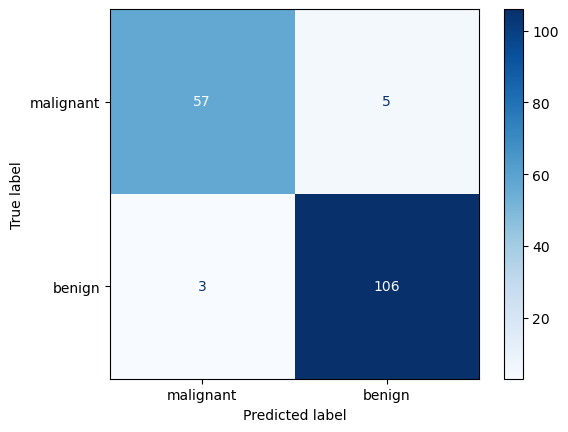

In [123]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test, display_labels=df.target_names, cmap=plt.cm.Blues)
plt.show()

### Afficher le __`classification_report`__ de __`dt`__

In [124]:
from sklearn.metrics import classification_report
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred, digits=8, target_names= df.target_names ))



              precision    recall  f1-score   support

   malignant  0.95000000 0.91935484 0.93442623        62
      benign  0.95495495 0.97247706 0.96363636       109

    accuracy                      0.95321637       171
   macro avg  0.95247748 0.94591595 0.94903130       171
weighted avg  0.95315842 0.95321637 0.95304555       171



### Afficher l'importance de chaque variable

In [125]:
X.shape

(569, 30)

In [126]:
dt.feature_importances_

array([0.00713262, 0.03566308, 0.        , 0.        , 0.        ,
       0.00713262, 0.01577406, 0.01634382, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01388715, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05521608, 0.        , 0.7191022 , 0.        ,
       0.        , 0.        , 0.12974838, 0.        , 0.        ])

In [127]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [128]:
names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
         'mean smoothness', 'mean compactness', 'mean concavity',
         'mean concave points', 'mean symmetry', 'mean fractal dimension',
         'radius error', 'texture error', 'perimeter error', 'area error',
         'smoothness error', 'compactness error', 'concavity error',
         'concave points error', 'symmetry error',
         'fractal dimension error', 'worst radius', 'worst texture',
         'worst perimeter', 'worst area', 'worst smoothness',
         'worst compactness', 'worst concavity', 'worst concave points',
         'worst symmetry', 'worst fractal dimension']

In [129]:
for var, importance in zip(names, dt.feature_importances_):
    if importance != 0:
        print(var, importance)

mean radius 0.0071326164874551965
mean texture 0.03566308243727598
mean compactness 0.0071326164874551965
mean concavity 0.01577405569341056
mean concave points 0.016343816469423122
area error 0.013887146841606846
worst texture 0.055216083966662534
worst area 0.7191021981181767
worst concave points 0.1297483834985339



#### Exécuter le code ci-dessous pour afficher l'arbre de décision

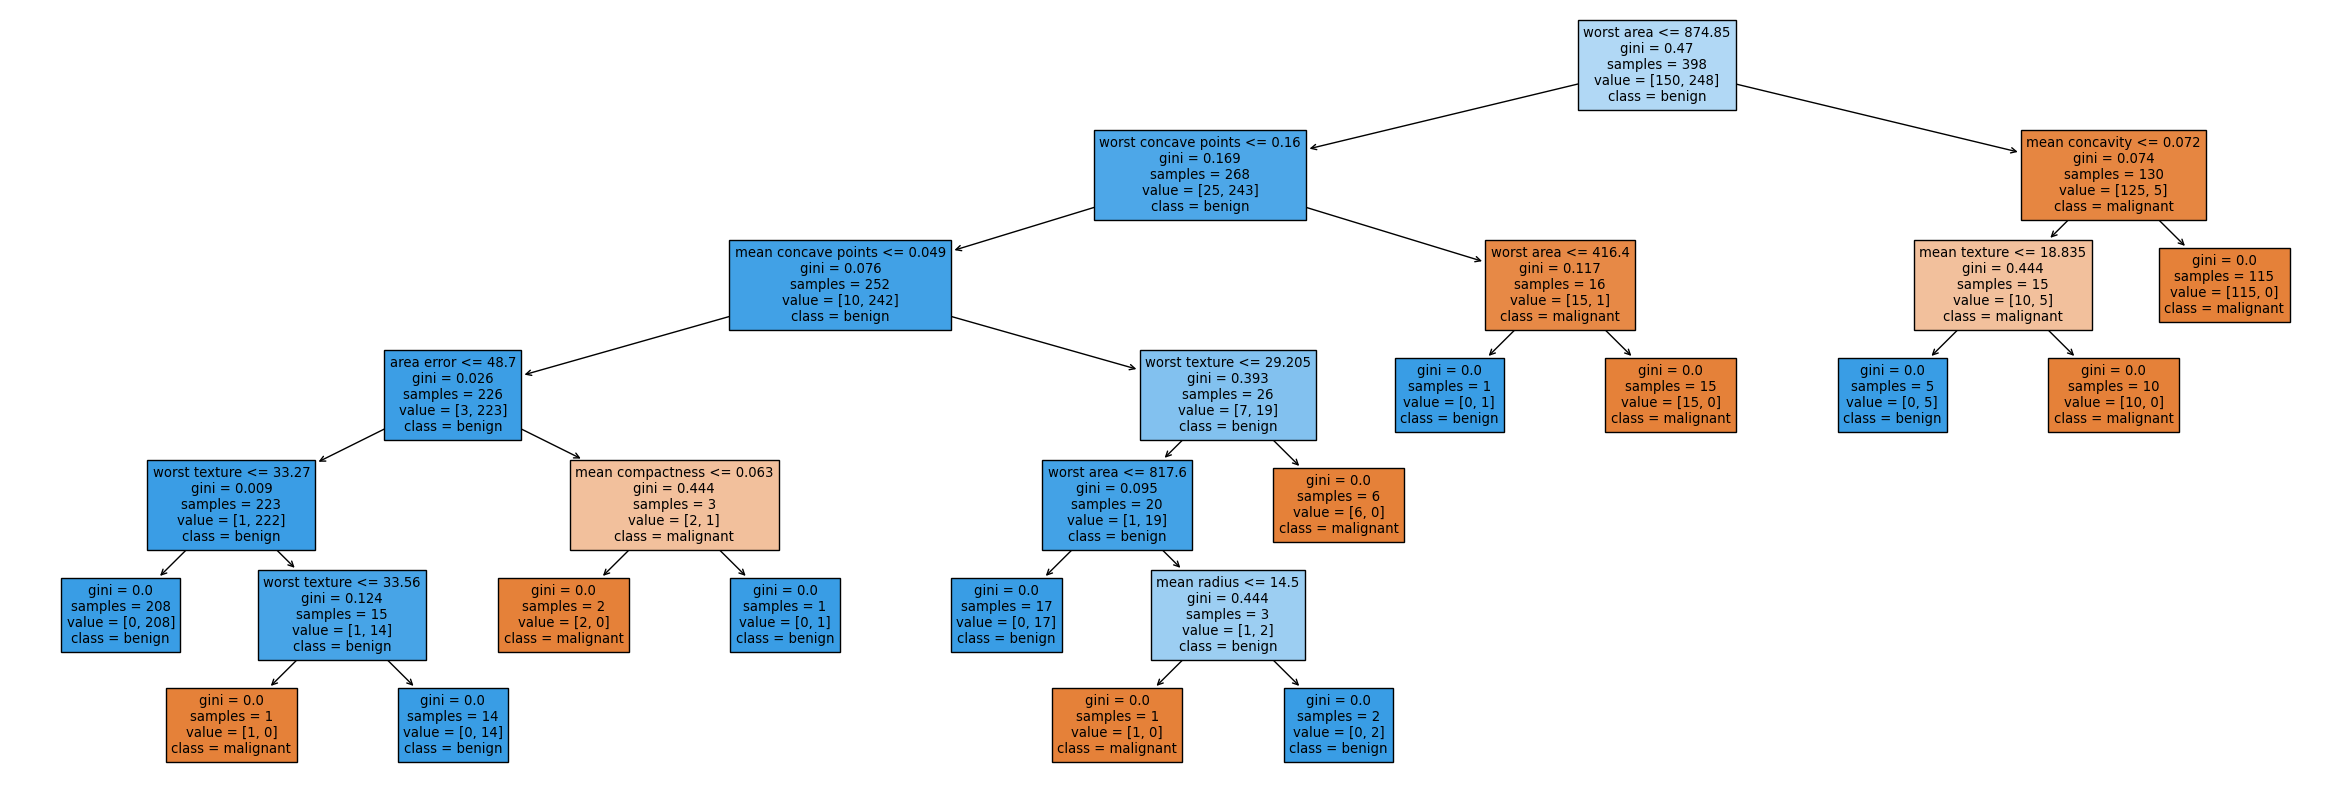

In [130]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,10))
plot_tree(dt, feature_names= names, class_names=df.target_names, filled=True)
plt.show()

#### Exécuter le code ci-dessous pour afficher l'arbre sous forme de régles de décision

In [131]:
from sklearn.tree import export_text
print(export_text(dt, feature_names=names))

|--- worst area <= 874.85
|   |--- worst concave points <= 0.16
|   |   |--- mean concave points <= 0.05
|   |   |   |--- area error <= 48.70
|   |   |   |   |--- worst texture <= 33.27
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- worst texture >  33.27
|   |   |   |   |   |--- worst texture <= 33.56
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- worst texture >  33.56
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- area error >  48.70
|   |   |   |   |--- mean compactness <= 0.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- mean compactness >  0.06
|   |   |   |   |   |--- class: 1
|   |   |--- mean concave points >  0.05
|   |   |   |--- worst texture <= 29.20
|   |   |   |   |--- worst area <= 817.60
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- worst area >  817.60
|   |   |   |   |   |--- mean radius <= 14.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- mean radius >  14.50
|   |   |   |   |   |   |--- class: 1


In [132]:
X.shape

(569, 30)

#### Que pensez-vous de la complexité de l'arbre ?


#### L'arbre est trop long et difficile à interpreter. Pour faire face à ce problème on va essayer de régler les hyperparamètre de notre modèle.

#### Créer un dictionaire __`param_grid`__, en vue de configurer les deux hyperparamètres suivants :
##### - __`criterion`__ : qui peut être soit l'indice de Gini soit l'entropie
##### - __`max_depth`__ : qui varie de 1 à 9

In [133]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,10)}

#### Charger la méthode GridSearchCV

In [134]:
from sklearn.model_selection import GridSearchCV


#### Créer une instance de recherche par grille appliquée sur l'algorithme de classification par arbre de décision. La recherche doit tester toutes les combinaisons des valeurs des hyperparamètres 

In [135]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=5)

#### Entrainer l'instance de modèle créé sur les sous-ensembles de données approprié.

In [136]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})


#### Afficher les meilleures valeurs des hyperparamètres réglés

In [137]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

#### Créer une instance __`final_model`__ de l'algorithme de classification par arbres de décision en utilisant les meilleurs hyperparamètres 

In [138]:
final_model = DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=2)

#### Entrainer __`final_model`__ sur le sous-ensemble de données approprié.

In [139]:
final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

#### Evaluer la performance de final_model sur le sous-ensemble de données approprié

In [140]:
print( 'le train_score=',final_model.score(X_train, y_train))
print( 'le test_score=',final_model.score(X_test, y_test))

le train_score= 0.9597989949748744
le test_score= 0.935672514619883


#### tracer la matrice de confusion de __`final_model`__

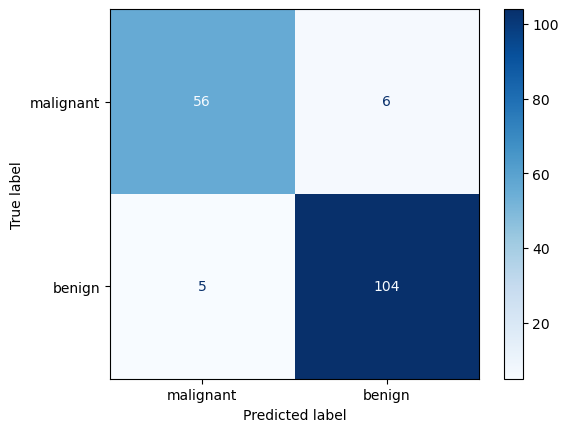

In [141]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, X_test, y_test, display_labels=df.target_names, cmap=plt.cm.Blues)
plt.show()

### Afficher le __`classification_report`__ de __`final_model`__

In [142]:
from sklearn.metrics import classification_report
y_pred = final_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=8, target_names= df.target_names ))


              precision    recall  f1-score   support

   malignant  0.91803279 0.90322581 0.91056911        62
      benign  0.94545455 0.95412844 0.94977169       109

    accuracy                      0.93567251       171
   macro avg  0.93174367 0.92867712 0.93017040       171
weighted avg  0.93551215 0.93567251 0.93555789       171



#### Comparer la performance de ce modèle dont les hyperparamètres ont été réglés avec celui de dt sans réglage d'hyperparamètres

#### Afficher l'arbre de décision de __`final_model`__ et le compararer à celui de la première partie.

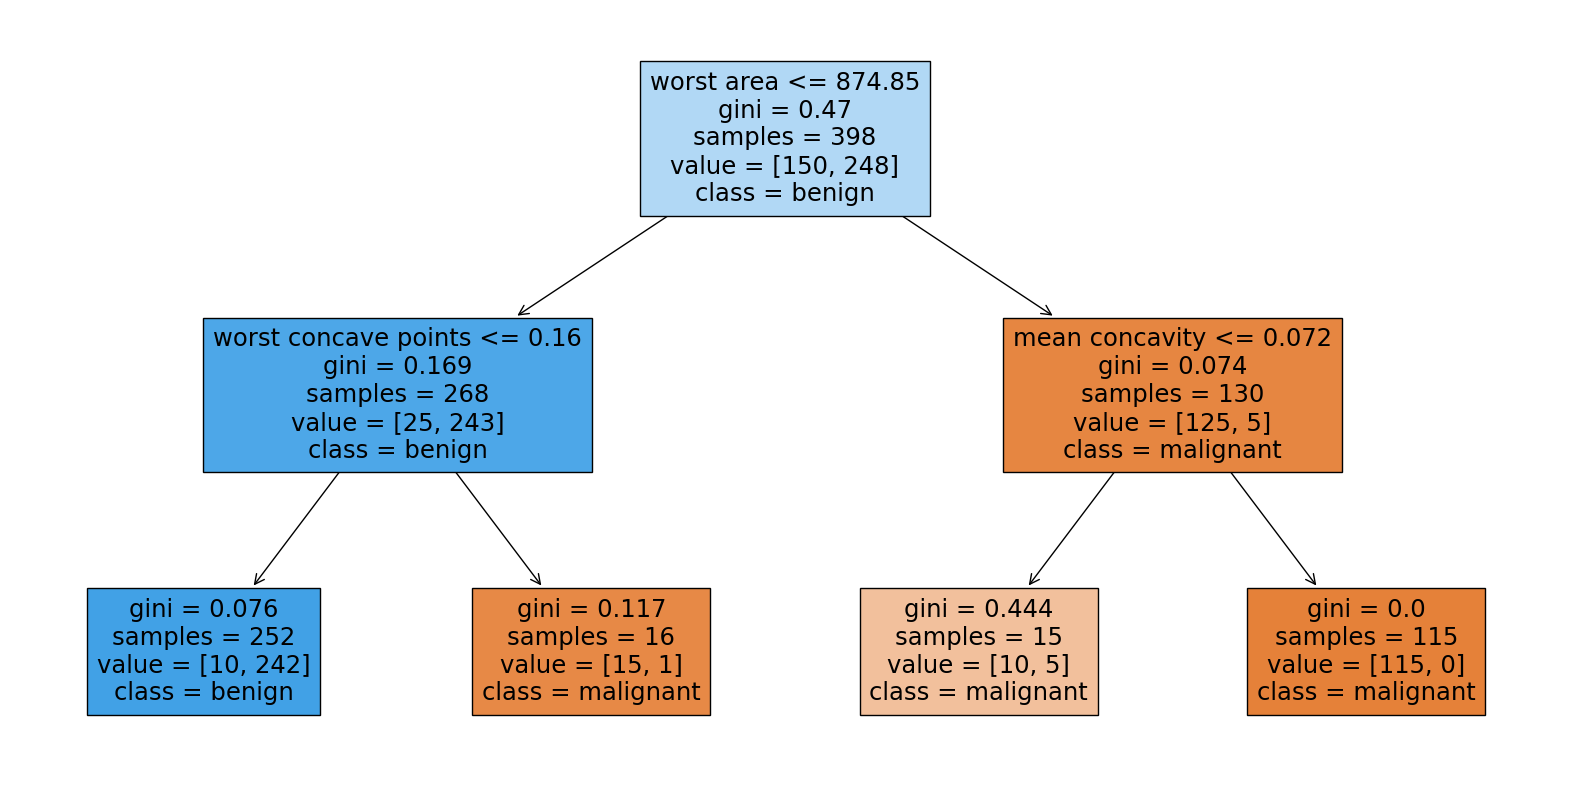

In [143]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(final_model, feature_names= names, class_names=df.target_names, filled=True)
plt.show()

In [144]:
final_model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01852365, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.82911137, 0.        ,
       0.        , 0.        , 0.15236498, 0.        , 0.        ])

#### Afficher l'arbre de décision de __`final_model`__ sous forme de règles de décision

In [145]:
from sklearn.tree import export_text
print(export_text(final_model, feature_names=names))

|--- worst area <= 874.85
|   |--- worst concave points <= 0.16
|   |   |--- class: 1
|   |--- worst concave points >  0.16
|   |   |--- class: 0
|--- worst area >  874.85
|   |--- mean concavity <= 0.07
|   |   |--- class: 0
|   |--- mean concavity >  0.07
|   |   |--- class: 0

